````
Лабораторная работа №4
````

In [28]:
import time
import numpy as np
import matplotlib.pyplot as plt
# import scipy.signal as signal

```
Задание №1
```

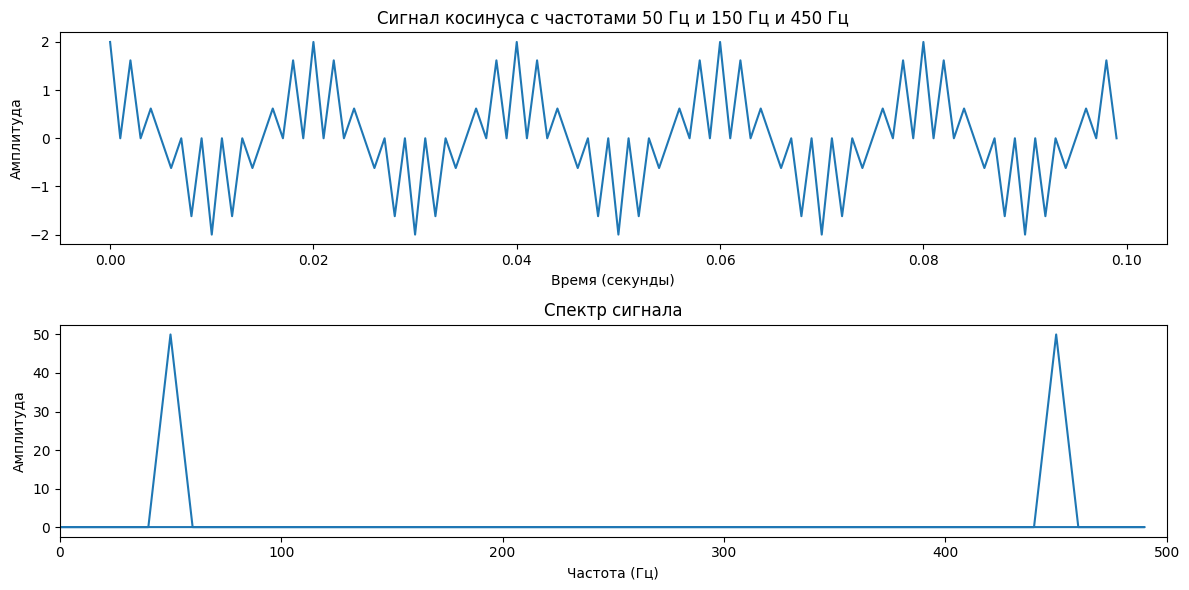

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем сигнал
fs = 1000  #Гц
t = np.linspace(0, 0.1, int(fs * 0.1), endpoint=False) # Временная шкала 1 секунда
signal_cos = np.cos(2 * np.pi * 50 * t) + 0*np.cos(2 * np.pi * 150 * t) + np.cos(2 * np.pi * 450 * t)

fft_result = np.fft.fft(signal_cos)
fft_freqs = np.fft.fftfreq(len(fft_result), 1 / fs) 
signal_spectrum = np.abs(np.fft.fft(signal_cos))

plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
plt.plot(t, signal_cos)
plt.title('Сигнал косинуса с частотами 50 Гц и 150 Гц и 450 Гц')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.subplot(2,1,2)
# Построим спектр сигнала

plt.plot(fft_freqs, signal_spectrum)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр сигнала')
plt.xlim(0,500)

plt.tight_layout()
plt.show()


````
Задание №2
````

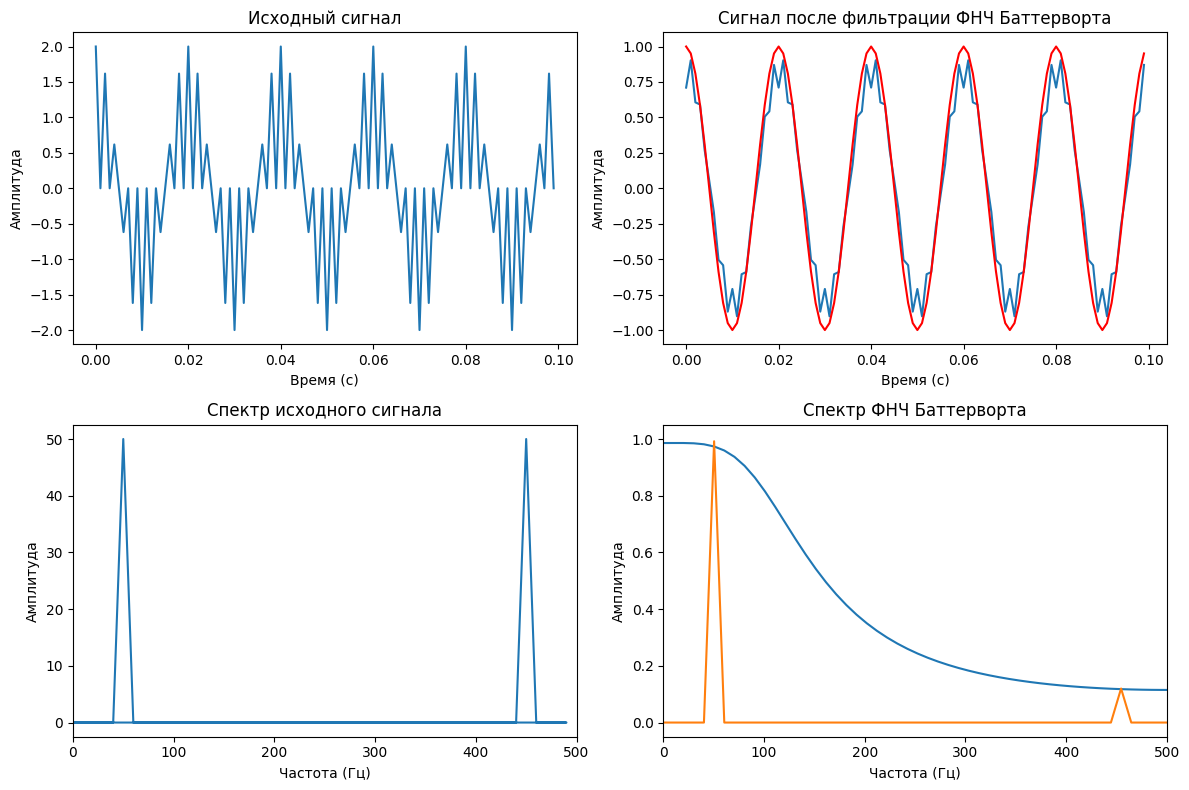

In [30]:
# Создаем ФНЧ Баттерворта
wc = 120  # Частота среза фильтра (в Гц)
w = np.linspace(0, 1000, len(t))  # Массив частот такой же длины, как и сигнал
# H = wc**2 / (-1j * 2 * np.sqrt(2) * wc * fft_freqs - fft_freqs**2 + wc**2)
# H = 1 / (1 + (w / wc)**(2 * 0.1))
def butterwort_low(w, wc):
  h = wc**2 / ((-w**2) + (1j) * np.sqrt(2)*wc*w + wc**2)
  return h + h[::-1]

H = butterwort_low(w,wc)
# Применяем фильтр к сигналу в частотной области
filtered_signal = np.fft.ifft(np.fft.fft(signal_cos) * (H))
signal50 = np.cos(2 * np.pi * 50 * t)
# Вычисляем спектр фильтра Баттерворта
filter_spectrum = np.abs(H)

# Создаем график
plt.figure(figsize=(12, 8))

# Подграфик 1: Исходный сигнал
plt.subplot(2, 2, 1)
plt.plot(t, signal_cos)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Исходный сигнал')

# Подграфик 2: Отфильтрованный сигнал
plt.subplot(2, 2, 2)
plt.plot(t, filtered_signal)
plt.plot(t,signal50,color = "red")
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сигнал после фильтрации ФНЧ Баттерворта')

# Подграфик 3: Спектр исходного сигнала
plt.subplot(2, 2, 3)
plt.plot(np.fft.fftfreq(len(t), 1 / fs), signal_spectrum)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр исходного сигнала')
plt.xlim(0,500)

# Подграфик 4: Спектр ФНЧ Баттерворта
plt.subplot(2, 2, 4)
plt.plot(w,abs(H))
# plt.plot(np.fft.fftfreq(len(t), 1 / fs), np.abs(np.fft.fft(filtered_signal)))
plt.plot(w,np.abs(np.fft.fft(filtered_signal))/np.max(np.abs(np.fft.fft(filtered_signal))))
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр ФНЧ Баттерворта')
plt.xlim(0,500)

plt.tight_layout()
plt.show()



In [31]:
# plt.plot(w,abs(H)+abs(H[::-1]))
# plt.plot(w,signal_spectrum/np.max(signal_spectrum))

````
Задание №3
````

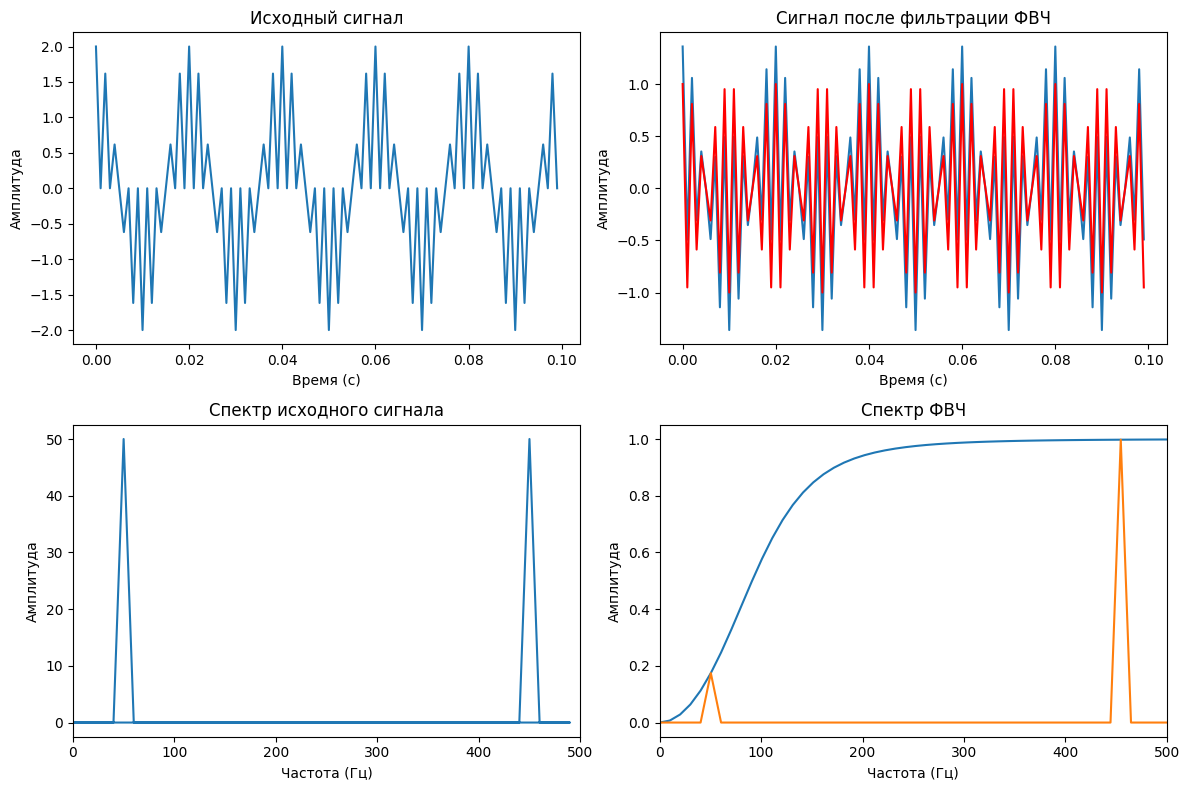

In [32]:
def butterwort_high(w, wc):
  h = w**2 / ((-wc**2) + 1j*np.sqrt(2) * wc * w + w**2)
  return h

H = butterwort_high(w,wc)

# Применяем фильтр к сигналу в частотной области
filtered_signal = np.fft.ifft(np.fft.fft(signal_cos) * H)
signal450 = np.cos(2 * np.pi * 450 * t)
# Вычисляем спектр фильтра Баттерворта
filter_spectrum = np.abs(H)

# Создаем график
plt.figure(figsize=(12, 8))

# Подграфик 1: Исходный сигнал
plt.subplot(2, 2, 1)
plt.plot(t, signal_cos)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Исходный сигнал')

# Подграфик 2: Отфильтрованный сигнал
plt.subplot(2, 2, 2)
plt.plot(t, filtered_signal)
plt.plot(t,signal450,color = "red")
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сигнал после фильтрации ФВЧ')

# Подграфик 3: Спектр исходного сигнала
plt.subplot(2, 2, 3)
plt.plot(np.fft.fftfreq(len(t), 1 / fs), signal_spectrum)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр исходного сигнала')
plt.xlim(0,500)

# Подграфик 4: Спектр ФНЧ Баттерворта
plt.subplot(2, 2, 4)
plt.plot(w,abs(H))
# plt.plot(np.fft.fftfreq(len(t), 1 / fs), np.abs(np.fft.fft(filtered_signal)))
plt.plot(w,np.abs(np.fft.fft(filtered_signal))/np.max(np.abs(np.fft.fft(filtered_signal))))
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр ФВЧ')
plt.xlim(0,500)

plt.tight_layout()
plt.show()


````
Задание №4
````

/home/kvasik/environments/my_env/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


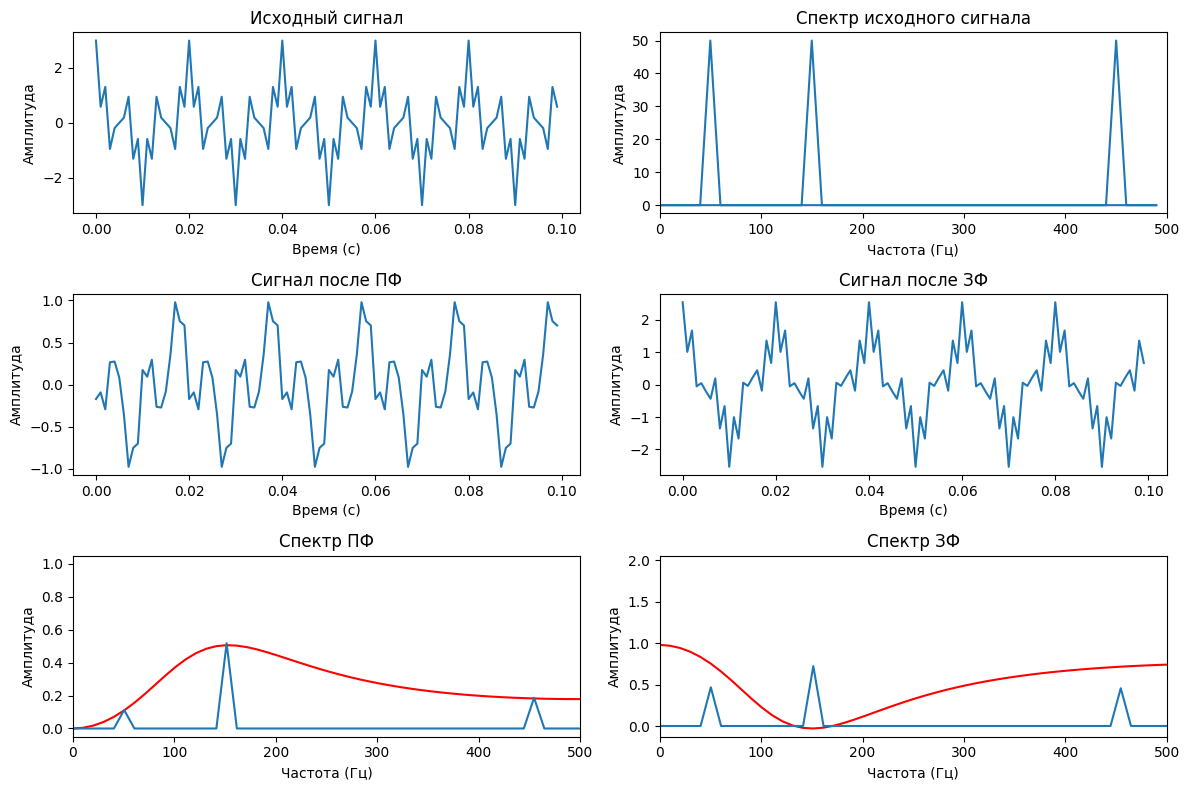

In [47]:
# Создаем сигнал
fs = 1000  #Гц
t = np.linspace(0, 0.1, int(fs * 0.1), endpoint=False) # Временная шкала 1 секунда
signal_cos = np.cos(2 * np.pi * 50 * t) + np.cos(2 * np.pi * 150 * t) + np.cos(2 * np.pi * 450 * t)
signal_spectrum = np.abs(np.fft.fft(signal_cos))


wc_x = 150  # Частота среза фильтра (в Гц)
w_x = np.linspace(0, 1000, len(t)) 

def P_filter(w_1,wc_1):
    return butterwort_high(w_1,wc_1) * butterwort_low(w_1,wc_1)

def Z_filter(w_1,wc_1):
    return butterwort_high(w_1,wc_1) + butterwort_low(w_1,wc_1)

filtered_pf_signal = np.fft.ifft(np.fft.fft(signal_cos) * P_filter(w_x,wc_x))

filtered_zf_signal = np.fft.ifft(np.fft.fft(signal_cos) * Z_filter(w_x,wc_x))

# Создаем график
plt.figure(figsize=(12, 8))

# Подграфик 1: Исходный сигнал
plt.subplot(3, 2, 1)
plt.plot(t, signal_cos)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Исходный сигнал')

plt.subplot(3, 2, 2)
plt.plot(np.fft.fftfreq(len(t), 1 / fs), signal_spectrum)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр исходного сигнала')
plt.xlim(0,500)

# Подграфик 2: Отфильтрованный сигнал
plt.subplot(3, 2, 3)
plt.plot(t, filtered_pf_signal)
# plt.plot(t,signal450,color = "red")
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сигнал после ПФ')

# Подграфик 2: Отфильтрованный сигнал
plt.subplot(3, 2, 4)
plt.plot(t, filtered_zf_signal)
# plt.plot(t,signal450,color = "red")
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сигнал после ЗФ')

plt.subplot(3, 2, 5)
plt.plot(w_x,np.abs(P_filter(w_x,wc_x)), color = 'red')
# plt.plot(np.fft.fftfreq(len(t), 1 / fs), np.abs(np.fft.fft(filtered_signal)))
plt.plot(w_x,np.abs(np.fft.fft(filtered_pf_signal))/np.max(np.abs(np.fft.fft(filtered_pf_signal))))
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр ПФ')
plt.xlim(0,500)

plt.subplot(3, 2, 6)
plt.plot(w_x,(Z_filter(w_x,wc_x)), color = 'red')
# plt.plot(np.fft.fftfreq(len(t), 1 / fs), np.abs(np.fft.fft(filtered_signal)))
plt.plot(w_x,np.abs(np.fft.fft(filtered_zf_signal))/np.max(np.abs(np.fft.fft(filtered_zf_signal))))
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр ЗФ')
plt.xlim(0,500)

plt.tight_layout()
plt.show()


````
Задание №5
````

````
Задание №6
````

/home/kvasik/environments/my_env/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


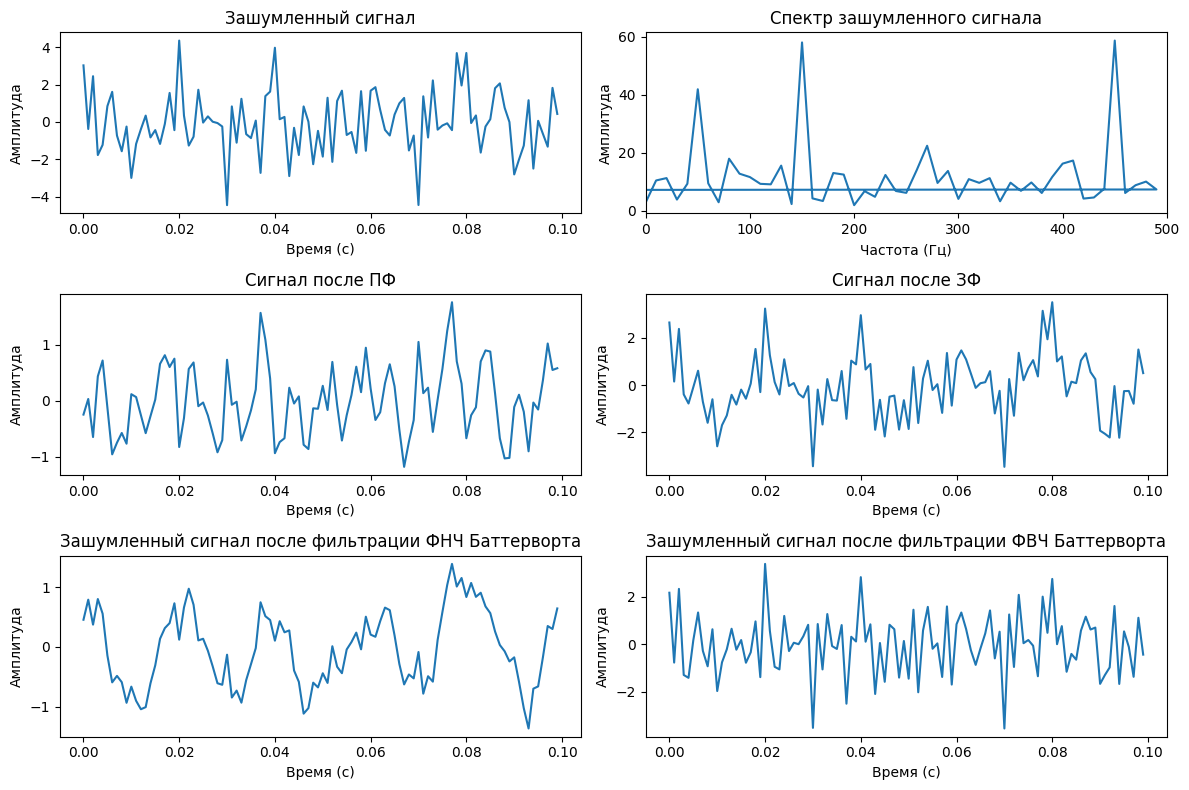

In [48]:
t = np.linspace(0, 0.1, int(fs * 0.1), endpoint=False) # Временная шкала 1 секунда
signal_cos = np.cos(2 * np.pi * 50 * t) + np.cos(2 * np.pi * 150 * t) + np.cos(2 * np.pi * 450 * t)

white_noise = np.random.normal(0,1.0,len(signal_cos))

noise_signal = white_noise + signal_cos

noise_signal_spectrum = np.abs(np.fft.fft(noise_signal))

filtered_pf_noise_signal = np.fft.ifft(np.fft.fft(noise_signal) * P_filter(w_x,wc_x))

filtered_zf_noise_signal = np.fft.ifft(np.fft.fft(noise_signal) * Z_filter(w_x,wc_x))

H_h = butterwort_high(w,wc)
H_l = butterwort_low(w,wc)

filtered_low_noise_signal = np.fft.ifft(np.fft.fft(noise_signal) * H_l)

filtered_hight_noise_signal = np.fft.ifft(np.fft.fft(noise_signal) * H_h)


# Создаем график
plt.figure(figsize=(12, 8))

# Подграфик 1: Исходный сигнал
plt.subplot(3, 2, 1)
plt.plot(t, noise_signal)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Зашумленный сигнал')

plt.subplot(3, 2, 2)
plt.plot(np.fft.fftfreq(len(t), 1 / fs), noise_signal_spectrum)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр зашумленного сигнала')
plt.xlim(0,500)

# Подграфик 2: Отфильтрованный сигнал
plt.subplot(3, 2, 3)
plt.plot(t, filtered_pf_noise_signal)
# plt.plot(t,signal450,color = "red")
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сигнал после ПФ')

# Подграфик 2: Отфильтрованный сигнал
plt.subplot(3, 2, 4)
plt.plot(t, filtered_zf_noise_signal)
# plt.plot(t,signal450,color = "red")
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сигнал после ЗФ')

# Подграфик 2: Отфильтрованный сигнал
plt.subplot(3, 2, 5)
plt.plot(t, filtered_low_noise_signal)
# plt.plot(t,signal50,color = "red")
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Зашумленный сигнал после фильтрации ФНЧ Баттерворта')

# Подграфик 2: Отфильтрованный сигнал
plt.subplot(3, 2, 6)
plt.plot(t, filtered_hight_noise_signal)
# plt.plot(t,signal50,color = "red")
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Зашумленный сигнал после фильтрации ФВЧ Баттерворта')


plt.tight_layout()
plt.show()



````
Задание №7
````